In [1]:
# GET 請求
# 普通單純的網頁，只需要用最簡單的 GET 請求即可直接下載，以下是一個簡單的範例：

# # 引入 requests 模組
# import requests

# # 使用 GET 方式下載普通網頁
# r = requests.get('https://www.google.com.tw/')
# 增加 URL 查詢參數
# 許多的 GET 請求都會在 URL 中夾帶簡短的查詢參數（例如搜尋關鍵字等），這種狀況可以這樣寫：

# # 查詢參數
# my_params = {'key1': 'value1', 'key2': 'value2'}

# # 將查詢參數加入 GET 請求中
# r = requests.get('http://httpbin.org/get', params = my_params)
# 我們可以觀察最後所產生的 URL：

# # 觀察 URL
# print(r.url)

# get, post, 95% 的时间, 你都是在使用这两个来请求一个网页.

# post
# 账号登录
# 搜索内容
# 上传图片
# 上传文件
# 往服务器传数据 等
# get
# 正常打开网页
# 不往服务器传数据

# 这样看来, 很多网页使用 get 就可以了, 大部分的页面, 都是只是 get 发送请求. 而 post, 我们则是给服务器发送个性化请求, 
# 比如将你的账号密码传给服务器, 让它给你返回一个含有你个人信息的 HTML.

# 从主动和被动的角度来说, post 中文是发送, 比较主动, 你控制了服务器返回的内容. 而 get 中文是取得, 是被动的, 你没有发送给
# 服务器个性化的信息, 它不会根据你个性化的信息返回不一样的 HTML.

Episode: 1.1 -- rating: 9.0
Episode: 1.2 -- rating: 8.8
Episode: 1.3 -- rating: 8.7
Episode: 1.4 -- rating: 8.8
Episode: 1.5 -- rating: 9.1
Episode: 1.6 -- rating: 9.2
Episode: 1.7 -- rating: 9.2
Episode: 1.8 -- rating: 9.0
Episode: 1.9 -- rating: 9.6
Episode: 1.10 -- rating: 9.5
Episode: 2.1 -- rating: 8.8
Episode: 2.2 -- rating: 8.5
Episode: 2.3 -- rating: 8.8
Episode: 2.4 -- rating: 8.8
Episode: 2.5 -- rating: 8.8
Episode: 2.6 -- rating: 9.1
Episode: 2.7 -- rating: 8.9
Episode: 2.8 -- rating: 8.8
Episode: 2.9 -- rating: 9.7
Episode: 2.10 -- rating: 9.4
Episode: 3.1 -- rating: 8.8
Episode: 3.2 -- rating: 8.6
Episode: 3.3 -- rating: 8.9
Episode: 3.4 -- rating: 9.6
Episode: 3.5 -- rating: 9.0
Episode: 3.6 -- rating: 8.8
Episode: 3.7 -- rating: 8.7
Episode: 3.8 -- rating: 9.0
Episode: 3.9 -- rating: 9.9
Episode: 3.10 -- rating: 9.1
Episode: 4.1 -- rating: 9.1
Episode: 4.2 -- rating: 9.7
Episode: 4.3 -- rating: 8.9
Episode: 4.4 -- rating: 8.8
Episode: 4.5 -- rating: 8.7
Episode: 4.6 -- r

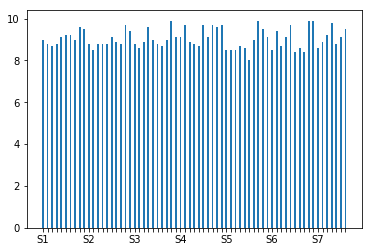

None


In [3]:
# enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
# 以下是 enumerate() 方法的语法:
# enumerate(sequence, [start=0])
# sequence -- 一个序列、迭代器或其他支持迭代对象。
# start -- 下标起始位置。
# eq = ['one', 'two', 'three']
# >>> for i, element in enumerate(seq):
# ...     print i, element
# ... 
# 0 one
# 1 two
# 2 three
#權力的遊戲
import requests
from bs4 import BeautifulSoup

url = 'http://www.imdb.com/title/tt0944947/episodes'

episodes = []
ratings = []

# Go over seasons 1 to 7
for season in range(1, 8):
    r = requests.get(url, params={'season': season})
    soup = BeautifulSoup(r.text, 'html.parser')
    listing = soup.find('div', class_='eplist')
    for epnr, div in enumerate(listing.find_all('div', recursive=False)):
        episode = "{}.{}".format(season, epnr + 1)
        rating_el = div.find(class_='ipl-rating-star__rating')
        rating = float(rating_el.get_text(strip=True))
        print('Episode:', episode, '-- rating:', rating)
        episodes.append(episode)
        ratings.append(rating)

import matplotlib.pyplot as plt

episodes = ['S' + e.split('.')[0] if int(e.split('.')[1]) == 1 else '' for e in episodes]

plt.figure()
positions = [a*2 for a in range(len(ratings))]
plt.bar(positions, ratings, align='center')
plt.xticks(positions, episodes)
print(plt.show())

In [4]:
import requests
from bs4 import BeautifulSoup


# 網址後方加上 MARKET:STOCK_ID 即為個股資訊. e.g, TPE:2330
G_FINANCE_URL = 'https://www.google.com/search?q='


def get_web_page(url, stock_id):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                             'AppleWebKit/537.36 (KHTML, like Gecko) '
                             'Chrome/66.0.3359.181 Safari/537.36'}
    resp = requests.get(url + stock_id, headers=headers)
    if resp.status_code != 200:
        print('Invalid url:', resp.url)
        return None
    else:
        return resp.text


def get_stock_info(dom):
    soup = BeautifulSoup(dom, 'html5lib')
    stock = dict()

    sections = soup.find_all('g-card-section')

    # 第 2 個 g-card-section, 取出公司名及即時股價資訊
    stock['name'] = sections[1].div.text
    spans = sections[1].find_all('div', recursive=False)[1].find_all('span', recursive=False)
    stock['current_price'] = spans[0].text
    stock['current_change'] = spans[1].text

    # 第 4 個 g-card-section, 有左右兩個 table 分別存放股票資訊
    for table in sections[3].find_all('table'):
        for tr in table.find_all('tr')[:3]:
            key = tr.find_all('td')[0].text.lower().strip()
            value = tr.find_all('td')[1].text.strip()
            stock[key] = value

    return stock


if __name__ == '__main__':
    page = get_web_page(G_FINANCE_URL, 'TPE:2330')
    if page:
        stock = get_stock_info(page)
        for k, v in stock.items():
            print(k, v)

name 台灣積體電路製造TPE: 2330
current_price 263.50 TWD
current_change +0.50 (0.19%)
開盤 265.00
最高 265.00
最低 263.00
殖利率 3.04%
上次收盤價 263.00
52 週高點 270.00
